In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('fivethirtyeight')
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

# Project 2: Testing Hypothesis and Simulations

This project aims to take the data and analysis from Project 1: Income vs. Home Prices in San Francisco and simulate various hypotheses that are testable with different methods. This project is divided into 3 sections, the first section showing the confidence intervals of the variable "How many years it would take to buy a home" and drawing conclusions and findings from it. The second section of the project is a continuation of the first section where a research study will be taken and compared with the confidence intervals of this project's data. The final section of the project will be a hypothesis and permutation test of crime in different zip codes.

Overall, the results from these sections should hopefully add on to the narrative of the previous project, which is that San Francisco's income and home value seems to rise in sync when San Francisco is looked at as a whole. But this is not the case - lower income neighborhoods are at risk of being priced out and gentrified; and their situation is easily overlooked due to the positive trends of the macro data. This project's main objective will be to explore whether the zip code shows any significance, if crime rate affects how many years it would take to buy a home, and if a high crime area translates to more crimes on a daily basis compared to low crime areas.

# Data Sources 

1. [U.S. Census Bureau](https://data.census.gov/) - This will be the primarily source for most of the data obtained in the project. Due to the fact that it is a government funded project and its credibility are widely known already, it will be a safe source to sample from.

2. [San Francisco Police Department 2003 to 2018 Report](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry/about_data) and [San Francisco Police Department 2018 to Present Report](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data) - This will be used to generate categorical data for the different zip codes that can be used for permutation shufflings to test hypothesis. It is sourced directly from the City and County of San Francisco.

3. [Neighborhood Scout](https://www.neighborhoodscout.com/ca/san-francisco/crime) - This source will provide identifications on what neighborhoods are considered high crime and/or low income. It sources directly from local enforcement authorities and originally released by the FBI.

4. [San Francisco County Economic Forecast](https://dot.ca.gov/-/media/dot-media/programs/transportation-planning/documents/data-analytics-services/transportation-economics/socioeconomic-forecasts/2023/2023-pdf/san-francisco-2023-a11y.pdf) - This will be used as the research study to compare this project's findings to; because project 2's scope is pretty precise, there are not a lot of a research studies that aligns with its content. This research study is conducted by the California government.

# City-wide Income and Home Values

Importing the table that contains the median income and median home value of San Francisco as a whole, ranging from 2010 to 2022. 

In [3]:
years_census = np.arange(2010, 2023)
income_census = make_array(71745, 69894, 73012, 77485, 85070, 92094, 103801, 110816, 112376, 123859, 119136, 121826, 136692)
table_income_census = Table().with_column("Year", years_census).with_column("Median Income", income_census)  

values_census = make_array(776900, 724600, 724500, 801500, 869600, 958400, 1040300, 1138400, 1230300, 1244900, 1185700, 1363400, 1404700)
table_values_census = Table().with_columns("Year", years_census, "Median Home Value", values_census)

census_full = table_income_census.join("Year", table_values_census)

zipcode = Table.read_table('Zipcode Data 2.csv')
zip_code_array = zipcode.column("Zip Code")
zip_code_year = zipcode.group("Year").column("Year")

census_full

Year,Median Income,Median Home Value
2010,71745,776900
2011,69894,724600
2012,73012,724500
2013,77485,801500
2014,85070,869600
2015,92094,958400
2016,103801,1040300
2017,110816,1138400
2018,112376,1230300
2019,123859,1244900


The following graphs serves as the foundation of the thesis - where seemingly home value rose mostly in tandem with income over time.

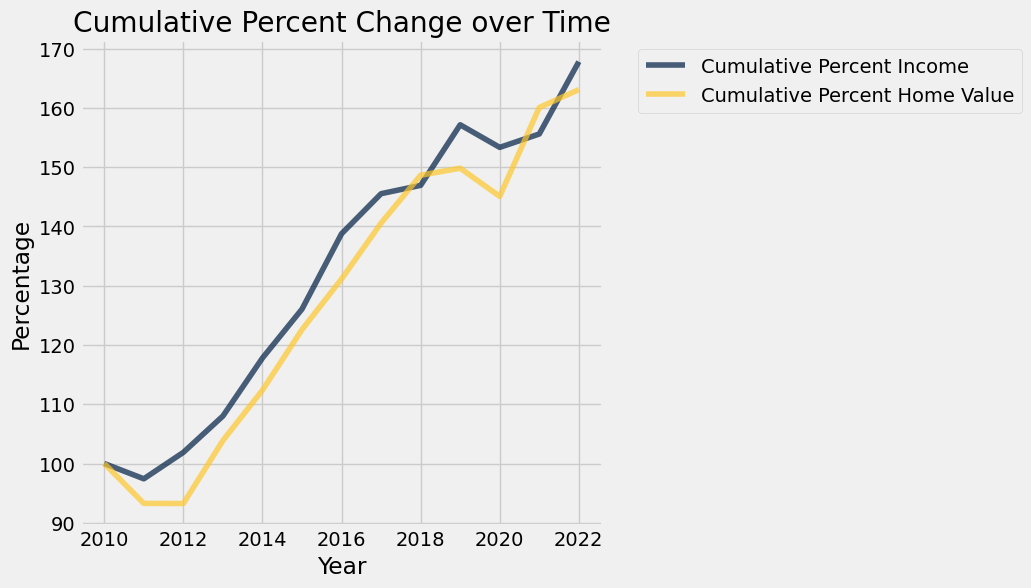

In [4]:
income_array = table_income_census.column("Median Income")
home_value_array = table_values_census.column("Median Home Value")

# Function that takes in an input of an array 'a', and then iterates through that array to 
# find the percentage change from one index to the next. 
# Then it outputs an array 'income_of_year' that shows the change.
def find_percentage(a):
    percentage = []
    for i in np.arange(0, (len(a)-1)):
        percentage.append(((a[i+1] - a[i]) / a[i]) * 100)
    return percentage


years_str = np.array(years_census).astype('str').tolist()
years_for_percent = []

for i in np.arange(0, (len(years_str) - 1)):
    years_for_percent.append(years_str[i] + " to " + years_str[i+1])


comparison_percentage = Table().with_column("Year", years_for_percent)
comparison_percentage = comparison_percentage.with_column("Percentage Income Change", 
                                                          find_percentage(income_array))
comparison_percentage = comparison_percentage.with_column("Percentage Home Value Change", 
                                                          find_percentage(home_value_array))

# Function that takes an input of an array 'a', and then iterates through that array by adding 
# one index to the next and displaying it in percentage value. By the end, it will out 
# array 'cumulative' that shows the cumulative percentage of each year beginning at 100% in 2010.
def cumulative_percent(a):
    cumulative = [100]
    cumulative.append(a[0] + 100)
    for i in np.arange(1, len(a)):
        cumulative.append(cumulative[i] + a[i])
    return cumulative

cumulative_percentage = Table().with_column("Year", years_census)
cumulative_percentage = cumulative_percentage.with_column("Cumulative Percent Income", 
                                                          cumulative_percent(comparison_percentage.column("Percentage Income Change")))
cumulative_percentage = cumulative_percentage.with_column("Cumulative Percent Home Value", 
                                                          cumulative_percent(comparison_percentage.column("Percentage Home Value Change")))

# Plots a graph that shows the combined increase in percentage over the years
cumulative_percentage.plot("Year")

plt.title("Cumulative Percent Change over Time")
plt.ylabel("Percentage")
plt.show()

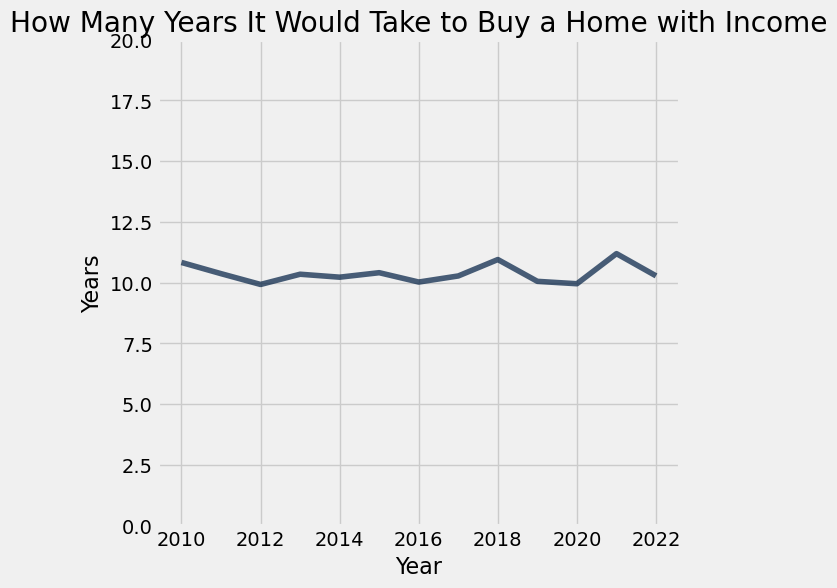

In [5]:
difference = (census_full.column("Median Home Value") / census_full.column("Median Income"))
difference_table = census_full.select("Year").with_column("Difference", difference)

# Plots the graph based on how many years it would take to buy a home with income
difference_table.plot("Year")

plt.title("How Many Years It Would Take to Buy a Home with Income")
plt.ylabel("Years")
plt.ylim(bottom=0, top=20)
plt.show()

From observing the graphs, we can conclude that home value has indeed been sharing a similar growth trajectory with income.

# Zip Code Income and Home Values

The following sections will dive deeper into the narrative by importing home value and income data from individual zip codes over the years.

In [6]:
zipcode = Table.read_table('Zipcode Data 2.csv')
zip_code_array = zipcode.column("Zip Code")
zip_code_year = zipcode.group("Year").column("Year")
zipcode

Year,Income,Home,Zip Code
2011,22159,562300,94102
2011,42801,660400,94103
2011,120257,743100,94105
2011,72467,633600,94112
2011,77612,886700,94121
2011,79441,794700,94122
2011,46025,545300,94124
2011,138003,977400,94127
2011,50378,904900,94133
2011,57075,581000,94134


Then, the variable of "How many years it would take to buy a home with income" will be calculated for each zip code.

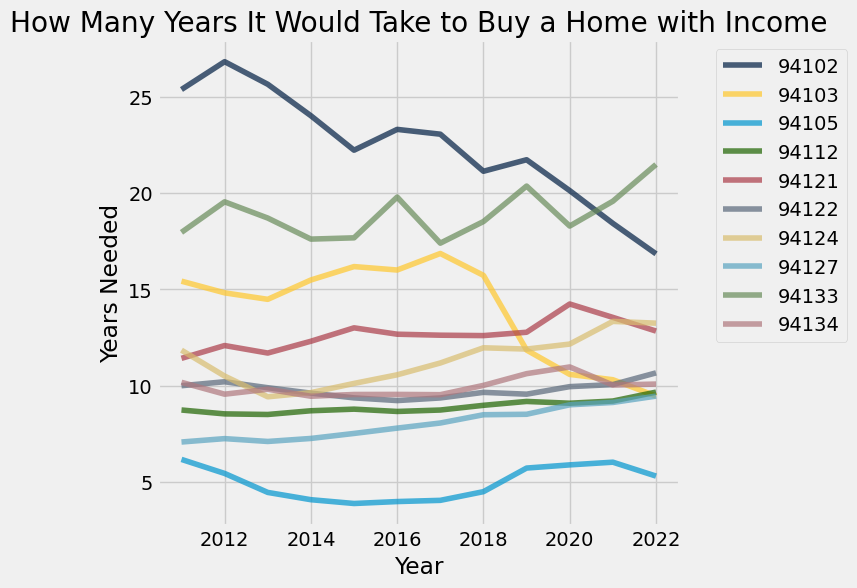

In [7]:
#A function for finding the years by taking in an int 'a' which is a zip code, and then it filters out the original zipcode table to find only the rows 
#that are in the zipcode 'a'. Then it takes the column array of Home and divide it by the column array of Income to find how many years it would to
#buy a home in that year for that zipcode. It will then output the array of years it will take.
def find_years(a):
    temp_zip = zipcode.where("Zip Code", are.equal_to(a))
    difference = (temp_zip.column("Home") / temp_zip.column("Income")) 
    return difference

zip_code_difference = Table().with_column("Year", zip_code_year)

for i in np.arange(len(zip_code_array)):
    temp_difference = find_years(zip_code_array[i])
    zip_code_difference = zip_code_difference.with_column(f'{zip_code_array[i]}', temp_difference)

zip_code_difference.plot("Year")
plt.title("How Many Years It Would Take to Buy a Home with Income")
plt.ylabel("Years Needed")
plt.show()

# Finding the Derivative of each Zip Code

In order to get a better idea of the trends and catch any significance that might have slipped visually, a deriviative of the above graph will be made. It will also be used for finding the confidence interval.

Year,94102,94103,94105,94112,94121,94122,94124,94127,94133,94134
2011 to 2012,1.44437,-0.60567,-0.728002,-0.201382,0.664317,0.20575,-1.3429,0.175566,1.58477,-0.615172
2012 to 2013,-1.17277,-0.337205,-0.985241,-0.0309136,-0.389718,-0.30944,-1.07654,-0.147302,-0.842412,0.256446
2013 to 2014,-1.6327,1.00405,-0.377682,0.193292,0.611929,-0.279884,0.215843,0.156572,-1.09215,-0.36212
2014 to 2015,-1.78842,0.695421,-0.196587,0.0833626,0.696299,-0.246941,0.478824,0.259901,0.065944,0.0899498
2015 to 2016,1.07978,-0.178343,0.100253,-0.119639,-0.330329,-0.14056,0.446611,0.276625,2.11546,0.00379281
2016 to 2017,-0.2492,0.857973,0.0628878,0.0740685,-0.0521352,0.136529,0.613816,0.26467,-2.39146,-0.0138587
2017 to 2018,-1.92373,-1.13483,0.451018,0.244547,-0.0204451,0.28995,0.788455,0.429129,1.12153,0.482495
2018 to 2019,0.597763,-3.87703,1.22434,0.201085,0.173657,-0.0945211,-0.066917,0.0240352,1.83994,0.608119
2019 to 2020,-1.6034,-1.2633,0.165515,-0.0924013,1.46603,0.391748,0.259922,0.491841,-2.07321,0.348903
2020 to 2021,-1.69946,-0.276365,0.139496,0.114318,-0.694759,0.106607,1.17672,0.121421,1.28777,-0.940321


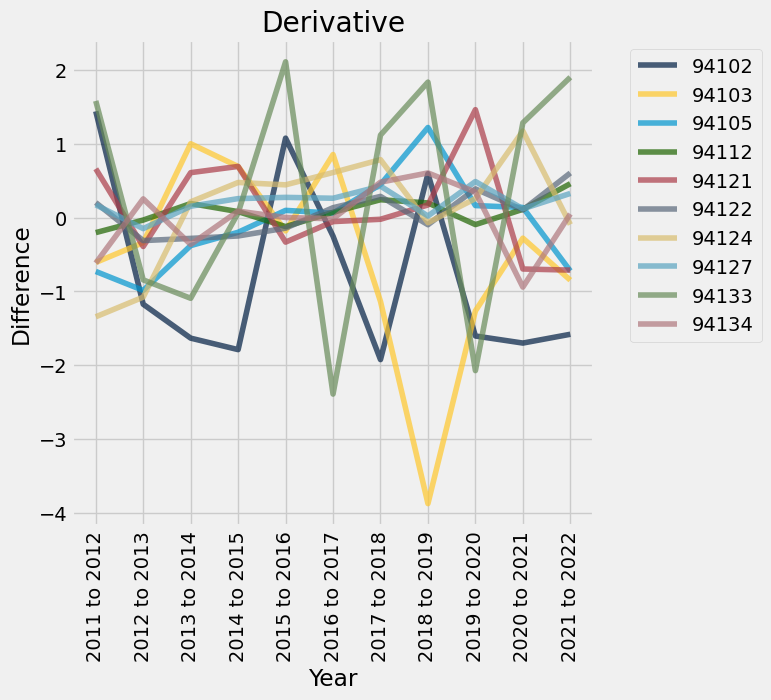

In [8]:
zip_years = zip_code_difference.column(0)
zip_years_str = np.array(zip_years).astype('str').tolist()
zip_years_array = []

for i in np.arange(0, (len(zip_years_str) - 1)):
    zip_years_array.append(zip_years_str[i] + " to " + zip_years_str[i+1])

zip_slope = zip_code_difference.drop(0)
zip_slope_2 = Table().with_column("Year", zip_years_array)
zip_name = make_array("94102", "94103", "94105", "94112", "94121", "94122", "94124", "94127", "94133", "94134")

# A function that finds the difference between indexes, e.g. the difference between index[1] and index[0]. It takes in a column x
# and iterates through every row
def find_difference(x):
    slope_array = make_array()
    for i in np.arange(len(x) - 1):
        slope_array = np.append(slope_array, (x.item(i+1) - x.item(i)))
    return slope_array

for i in np.arange(len(zip_name)):
    zip_slope_2 = zip_slope_2.with_column(zip_name.item(i), find_difference(zip_slope.column(i)))

zip_slope_2.show()
zip_slope_2.plot("Year")
plt.xticks(rotation=90)
plt.title("Derivative") 
plt.ylabel("Difference")
#plt.figure(figsize=(6, 2))
plt.show()

# Confidence Intervals

With the derivative calculated, the next step will be to calculate the confidence interval by defining a function that takes in a column of a table and a number representing the level of confidence. The bootstrap simulation will simulate 10,000 repetitions and append the results to an array, and from that array the percentile will be calculated and outputted as the confidence interval. The unknown parameter that the confidence interval will attempt to find is whether the zip code as shown in its deriviative has any significance when considering the variable of "How many years it would take to buy a home with income". 

The confidence interval will be interpreted as: if the interval contains 0, that means it mostly follows a general trend of income growing alongside home vales. However, if it does not contain 0, then the zip code is significant and surprising. 

In [9]:
# A function to generate the confidence interval
def generate_ci(t, level): 
    '''Compute a level% confidence interval (as an array) of the 
    average of the population for which column 0 of Table t contains a sample.'''
    # A seed to generate the same results due to the low sample size
    np.random.seed(350) 
    # Create an array (stats) of sample averages from 10,000 
    # bootstrap resamples.
    stats = make_array()
    for i in np.arange(10000):
        resampled_data = t.sample()
        stat = np.mean(resampled_data.column(0))
        stats = np.append(stats, stat)

    # Create an array (ci) where the first element of the array
    # is the lower bound of the interval and the second element is 
    # the upper bound.

    ci = make_array()
    ci_lower = percentile((100 - level) / 2, stats)
    ci = np.append(ci, ci_lower)
    ci_upper = percentile(100 - ((100 - level) / 2), stats)
    ci = np.append(ci, ci_upper)

    return ci

ci_zip = "94105"
ci_level = 95
ci = generate_ci(zip_slope_2.select(ci_zip), ci_level)
print(f"The {ci_level}% confidence interval for {ci_zip} is {ci}")

The 95% confidence interval for 94105 is [-0.420413    0.28405572]


# Using the generate_ci Function to Simulate Every Zip Code

With the confidence interval function, a simulation will be done for every zip code and sorted into a table.

In [10]:
total_zip = make_array()
ci_table = Table()

for i in np.arange(len(zip_name)):

    zip_1 = generate_ci(zip_slope_2.select(zip_name.item(i)), 95)
    ci_table = ci_table.with_column(zip_name.item(i), zip_1)
    #also adding it to an array for easier access
    total_zip = np.append(total_zip, zip_1)
                          
ci_table

94102,94103,94105,94112,94121,94122,94124,94127,94133,94134
-1.43639,-1.38323,-0.420413,-0.0207049,-0.249122,-0.100471,-0.330189,0.112403,-0.631523,-0.278874
-0.0298292,0.14505,0.284056,0.192998,0.519501,0.233019,0.520004,0.314393,1.23352,0.244089


From the results, we see that 94102 does not have 0 inside its interval and will be noted as one of the significant zip codes. However, since the data size is **small**, results will differ, sometimes including or excluding 0's in some results. This particular result is calculated based on a predetermined seed (350) and it will be the "standard" result going forward. This also applies in the following section when computing the 3 year moving averages. 

In order to explore deeper, a confidence interval will be constructed on a year to year basis and sorted into 3 tables of confidence intervals that span across 3 years each.

In [11]:
def moving_average(row, level):
    ci_table_avg = Table()
    for i in np.arange(len(zip_name)):
        zip_2 = generate_ci(zip_slope_2.select(zip_name.item(i)).take(row), level)
        ci_table_avg = ci_table_avg.with_column(zip_name.item(i), zip_2)
    return ci_table_avg

ci_table_3yr_1 = moving_average(np.arange(3), 95)
ci_table_3yr_2 = moving_average(np.arange(3, 6), 95)
ci_table_3yr_3 = moving_average(np.arange(6, 9), 95)

print("2011 to 2014")
ci_table_3yr_1.show()
print("2014 to 2017")
ci_table_3yr_2.show()
print("2017 to 2020")
ci_table_3yr_3.show()

2011 to 2014


94102,94103,94105,94112,94121,94122,94124,94127,94133,94134
-1.6327,-0.60567,-0.985241,-0.201382,-0.389718,-0.30944,-1.3429,-0.147302,-1.09215,-0.615172
1.44437,1.00405,-0.377682,0.193292,0.664317,0.20575,0.215843,0.175566,1.58477,0.256446


2014 to 2017


94102,94103,94105,94112,94121,94122,94124,94127,94133,94134
-1.78842,-0.178343,-0.196587,-0.119639,-0.330329,-0.246941,0.446611,0.259901,-2.39146,-0.0138587
1.07978,0.857973,0.100253,0.0833626,0.696299,0.136529,0.613816,0.276625,2.11546,0.0899498


2017 to 2020


94102,94103,94105,94112,94121,94122,94124,94127,94133,94134
-1.92373,-3.87703,0.165515,-0.0924013,-0.0204451,-0.0945211,-0.066917,0.0240352,-2.07321,0.348903
0.597763,-1.13483,1.22434,0.244547,1.46603,0.391748,0.788455,0.491841,1.83994,0.608119


In these tables, we can see that 94105 and 94103 does not include 0 in their confidence interval, as well as 94102 from the earlier confidence interval calculations. We can conclude with a 95% confidence that despite the overall synchronization of income and home value as depicted when we look at San Francisco as a whole, there are zip codes are not sharing the same trend with the others. Furthermore, despite that some of these zip codes such as 94112 and 94121 that has erratic slopes, their confidence intervals do not make them significant, further amplifying the importance of zip codes that fluctuated so wildly. 

To investigate whether these significant zip codes have any important traits as clues that we can use, the following table from Neighborhood Scout that contains traits of zip codes will be imported.

In [63]:
zipcode_desc = Table.read_table('Zipcode Data 1.csv')
zipcode_desc.show()

Zip Codes,Area,Trait
94102,Tenderloin,Considered high crime according to the DA office.
94103,Soma/Mission/Downtown,Downtown/central San Francisco/one of the highest crime ...
94105,Union Square/Academy of Art University,Downtown/High crime rate/Also neighboring one of the ric ...
94112,Mission,Considered high crime according to the DA office.
94121,Seacliff,One of the most expensive areas in San Francisco
94122,Sunset/Golden Gate Park,One of the more popular zip codes to live in.
94124,Bayview,Considered high crime according to the DA office.
94127,St Francis Wood,One of the most expensive areas in San Francisco
94133,Telegraph Hill,High crime rate
94134,McLaren Park / South McLaren Park,South of Mclaren Park is one of the safest areas in San ...


From the table, we can see that the zip codes that we concluded were significant: 94102, 94103, and 94105, Their traits are as follows: 94102 is noted as a high crime area, 94103 is also considered a high crime rate area, and finally, 94105 is also one of the high crime areas. Their shared trait of being high crime rate area further reaffirms that neighborhoods that are historically low income and high crime rate have a much harder time catching up to home values with their income. A more in-depth research and analysis of this observation is conducted in Project 1, and since the narrative of Project 2 is closely following Project 1, we can conclude with 95% confidence that this narrative could be what is happening in San Francisco.

# Taking a Study and Comparing Results

The study that the project will look at is [San Francisco County Economic Forecast](https://dot.ca.gov/-/media/dot-media/programs/transportation-planning/documents/data-analytics-services/transportation-economics/socioeconomic-forecasts/2023/2023-pdf/san-francisco-2023-a11y.pdf). 

The following image depicts the results of the study where they estimated median home price in San Francisco over the years, as well as for the future. Unfortunately, due to the scope of Project 2 and the fact that there are not many research studies available that aligns with the topics of this project, this San Francisco research study was the closest study that could be obtained. The following section does not necessarily add additional information to the thesis or the narrative, it is functioning as a application of learned knowledge.

![Research Graph](https://i.imgur.com/53Y0IRw.png)

Now we will import our data to make estimations.

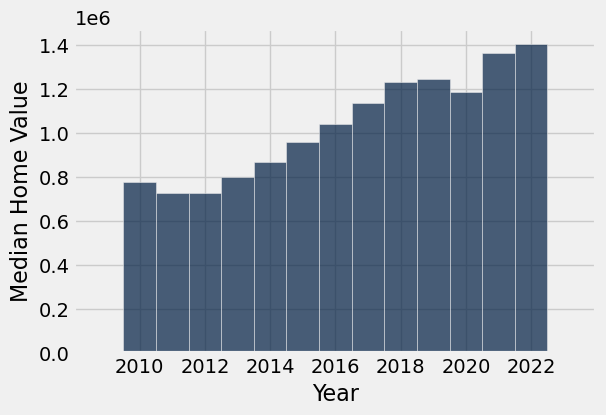

In [13]:
census_for_study = census_full.drop("Median Income")
census_for_study.bar("Year")

The following section will create bootstrap samples of census_for_study with 5000 iterations from which we will estimate with a confidence interval what the median home value will be for 2023.

In [14]:
sample_size = 500
repetitions = 5000
prediction_array = make_array()

# A function to return one bootstrap sample 
def bootstrap_sample(table, size):
    resample = table.select("Median Home Value").sample(with_replacement=True, k=size)
    return np.median(resample.column("Median Home Value"))

bootstrapped_results = make_array()
for i in np.arange(repetitions):
    prediction = bootstrap_sample(census_for_study, sample_size)
    bootstrapped_results = np.append(bootstrapped_results, prediction)

ci_lower = percentile(2.5, bootstrapped_results)
ci_upper = percentile(97.5, bootstrapped_results)
print(f"We estimate with 95% confidence that the median home value for 2023 is between ${ci_lower} and ${ci_upper}")

We estimate with 95% confidence that the median home value for 2023 is between $958400.0 and $1138400.0


Before we address the results, the disclaimer has to be made that the table census_for_study contains very little data (only 13 rows of data) and bootstrapping is not the ideal approach to estimating the 2023 home value as bootstrapping is more effective with a larger dataset. Availability of data and the availability of research studies to compare estimations with is severely limited due to the narrow nature of Project 2, from which that bootstrapping is the only available method to conduct research for this particular section.

From this result of a 95% confidence interval, 958400.0 and 1138400.0, we can see that it is very far from the predicted provided by the research study, where it is approximately a bit over 1600000. This tells us that there are a lot of external factors that went into the research study; such as housing value formulas, standard deviations, more sophisticated models, and most importantly, more data. This shows that without an ample amount of preparation and access to relevant information, it is quite hard to make estimates accurately.

# Hypothesis Testing

The following tables will be imported which contains two columns each, one for the category of crime and one for the zip code. However, because of restrictions with the API, 2011-2017 only features crime rate from a single day of that year. This section serves the purpose of seeing if the conclusion that we drew from the confidence interval is correct. Therefore, we are looking at primarily the relationship crime rate has with zip codes to see if crime rate has any association with higher years to buy a home with income.

In [15]:
# Importing crime data in San Francisco with column year and incident category from 2011 to 2022
reports_for_year = {}
reports_for_year[2011] = Table.read_table("incidents_for_year_2011.csv")
reports_for_year[2012] = Table.read_table("incidents_for_year_2012.csv")
reports_for_year[2013] = Table.read_table("incidents_for_year_2013.csv")
reports_for_year[2014] = Table.read_table("incidents_for_year_2014.csv")
reports_for_year[2015] = Table.read_table("incidents_for_year_2015.csv")
reports_for_year[2016] = Table.read_table("incidents_for_year_2016.csv")
reports_for_year[2017] = Table.read_table("incidents_for_year_2017.csv")
reports_for_year[2018] = Table.read_table("incidents_for_year_2018.csv")
reports_for_year[2019] = Table.read_table("incidents_for_year_2019.csv")
reports_for_year[2020] = Table.read_table("incidents_for_year_2020.csv")
reports_for_year[2021] = Table.read_table("incidents_for_year_2021.csv")
reports_for_year[2022] = Table.read_table("incidents_for_year_2022.csv")

In [16]:
reports_for_year[2020]

category,zip code
Motor Vehicle Theft,94104
Assault,94105
Other Miscellaneous,94101
nan,94141
Larceny Theft,94141
Motor Vehicle Theft,94102
Malicious Mischief,94108
Miscellaneous Investigation,94109
Non-Criminal,94108
Burglary,94130


The following sections will utilize the function sample_proportions to create random samples to test the following null and alternative hypothesis: 

*Null Hypothesis: Crime rate doesn't necessarily have an effect on years it would take to buy a home*.

*Alternative Hypothesis: Crime rate would affect the years it would take to buy a home*.

The test statistic used will be the absolute difference between the model proportions and the expected proportions. 

The following code cell will generate a random year to observe from the list of years available, this is because this is an easier way to test specific years later on where the graph shows a significant change from that year. It is also because combining the tables have been tricky and the output doesn't generate the desired results. 

In [17]:
np.random.seed(1234) 
random_year = np.random.choice(np.arange(2011, 2023))
random_year

2014

In [18]:
crime_report = {}
for year in np.arange(2011, 2023):
    crime_report[year] = reports_for_year[year].group("zip code").where("zip code", are.not_equal_to("Not in San Francisco"))

crime_report[2014]

zip code,count
94101,30
94102,38
94104,38
94105,4
94107,11
94108,61
94109,19
94110,13
94111,12
94112,10


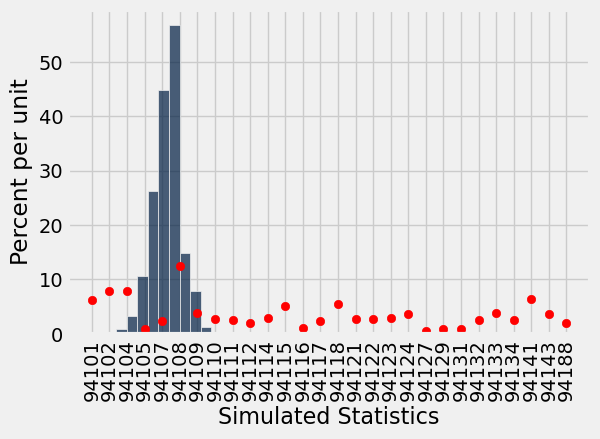

In [19]:
proportions = crime_report[2014].column("count") 
model_proportions = make_array()
# Under the model, zip codes that have over model proportion crime rates tend to have higher years to buy a home
for i in np.arange(28):
    model_proportions = np.append(model_proportions, 1 / crime_report[2014].num_rows)
expected_proportions = proportions / np.sum(proportions) 

# Generate the test statistic
def statistic(expected_prop, actual_prop):
    answer = np.abs(expected_prop - actual_prop) * 100
    return answer

# Simulate one simulation of the test statistic
def simulation_and_statistic(model_proportions, expected_proportions):
    simulation = sample_proportions(500, model_proportions)
    simulation_stats = statistic(expected_proportions, simulation).item(1)
    return simulation_stats

num_repetitions = 10000
simulated_statistics = []

# Appending multiple simulation runs
for i in np.arange(num_repetitions):
    sim_run = simulation_and_statistic(model_proportions, expected_proportions)
    simulated_statistics = np.append(simulated_statistics, sim_run)

t = Table().with_column('Simulated Statistics', simulated_statistics)
observed_statistic = expected_proportions
t.hist()
#plt.scatter(observed_statistic, crime_report[2014].column(0), color='red')
plt.scatter(crime_report[2014].column(0), observed_statistic, color='red')
plt.xticks(rotation=90)
plt.show()

This graph is a bit hard to read because we would need one zip code to use plt.scatter() on to see that specific zip code's behavior on the histogram. So the following section will generate a random year where we will use to compare with the simulated data. 

Due to the nature of how this sampling and model will work, we are testing multiple zip codes against the model and the results are not very enlightening. So instead, we will test a specific zip code (94102, picked due to its highest years to buy value in the previous sections) and see what the p-value is. 

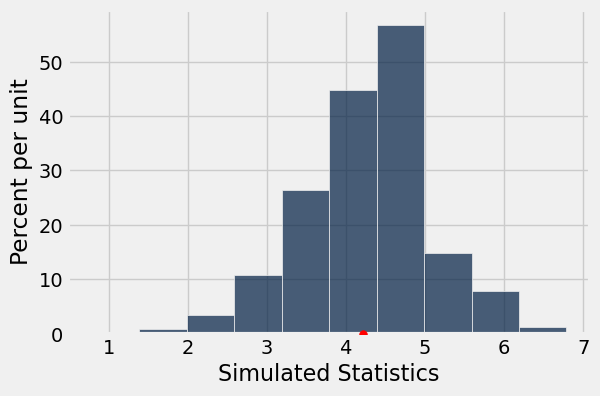

P-val: 0.5162


In [66]:
# Return the expected_proportions of a specific zip code from input
def find_observed(year, zip_code):
    answer = crime_report[year].where("zip code", are.equal_to(zip_code)).column("count").item(0)
    answer = answer / np.sum(crime_report[year].column("count"))
    return answer 

#Taking a random zip code 94102
t = Table().with_column('Simulated Statistics', simulated_statistics)
t.hist()
observed_statistic = statistic(model_proportions.item(0), find_observed(2014, "94102"))
plt.scatter(observed_statistic, 0, color='red', s=30, zorder=3);
plt.show()

proportion_test = []
proportion_greater_or_equal = 0
for i in np.arange(len(simulated_statistics)):
    if simulated_statistics[i] <= observed_statistic:
        proportion_test = np.append(proportion_test, simulated_statistics[i])

proportion_greater_or_equal = len(proportion_test) / len(simulated_statistics)
print("P-val:", proportion_greater_or_equal)

The p-value from 94102 returns a 0.5162, it is quite large and is possibly saying that the way we constructed the model went wrong somewhere. However, if we take 94134, which is categorized as a really safe neighborhood, we get:

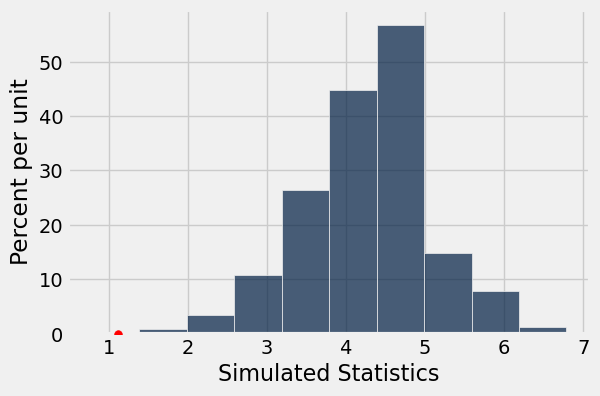

P-val: 0.0002


In [65]:
t_2 = Table().with_column('Simulated Statistics', simulated_statistics)
t_2.hist()
observed_statistic_2 = statistic(model_proportions.item(0), find_observed(2014, "94134"))
plt.scatter(observed_statistic_2, 0, color='red', s=30, zorder=3);
plt.show()

proportion_test = []
proportion_greater_or_equal = 0
for i in np.arange(len(simulated_statistics)):
    if simulated_statistics[i] <= observed_statistic_2:
        proportion_test = np.append(proportion_test, simulated_statistics[i])

proportion_greater_or_equal = len(proportion_test) / len(simulated_statistics)
print("P-val:", proportion_greater_or_equal)

We get a p-value that seem to suggest that the alternative is accepted. This is probably due to the nature of the data, where we have multiple categorical variables (zip codes). So a relatively safe neighborhood such as 94134 returns a p-value of 0.0002 which means the results lean more towards the alternative hypothesis where crime rate can affect the years it would take to buy a home. While a high crime rate area such as 94102 returns a big p-value 0.5162, from which case we would embrace the null where crime rate does not affect the years to buy a home. 

Each category generates different p-values and conflicts between accepting or rejecting the null, due to the limitations of my current ability, I cannot model it another way where it would generate a effective and accurate p-value. However, we can still make a general assumption about why this is happening - if we take a safe neighborhood, it returns a statistically significant result, but with a unsafe neighborhood, it is not statistically significant. If we generalize this trend, we can make the assumption that high crime areas are the bias in the data we used, because naturally reports won't be coming in from safe neighborhoods. So instead of looking at p-value at face value, we can visualize it as a high p-value means that the zip code is over the model proportions and would correlate to a higher years to buy on the graph. While a low p-value means that it is beneath the model proportion and would translate to a lower years to buy on the graph. And if we look at the graph and check for 94102 and 94134, we can see that this is the case. While I don't know if these types of claims can be made for p-value as it is a pretty big leap, but it is one of the only generalizations I could come up with when looking at the way I structured this experiment and the results.  

In [64]:
zipcode_desc.show()

Zip Codes,Area,Trait
94102,Tenderloin,Considered high crime according to the DA office.
94103,Soma/Mission/Downtown,Downtown/central San Francisco/one of the highest crime ...
94105,Union Square/Academy of Art University,Downtown/High crime rate/Also neighboring one of the ric ...
94112,Mission,Considered high crime according to the DA office.
94121,Seacliff,One of the most expensive areas in San Francisco
94122,Sunset/Golden Gate Park,One of the more popular zip codes to live in.
94124,Bayview,Considered high crime according to the DA office.
94127,St Francis Wood,One of the most expensive areas in San Francisco
94133,Telegraph Hill,High crime rate
94134,McLaren Park / South McLaren Park,South of Mclaren Park is one of the safest areas in San ...


# Permutation Test

A permutation test by shuffling the labels of high crime or low crime zip codes with the values of the crime count to see if crime classification of a zip code has any relationship with the number of crimes that get reported on a random day.

Null hypothesis: Zip codes have around the same crime rate on a random day regardless of its classification of high crime or not.

Alternative hypothesis: Zip codes categorized as a high crime area with have higher crime rate on a random day

In [25]:
np.random.seed(345) 
random_year_2 = np.random.choice(np.arange(2011, 2023))
random_year_2

2019

In [40]:
zip_code_crime_2019 = make_array("94102", "94105", "94112", "94121", "94122", "94124", "94127", "94133", "94134")
zip_code_category = make_array(0, 0, 0, 1, 1, 0, 1, 0, 1)
count_crime_2019 = make_array(51, 4, 17, 6, 2, 17, 2, 23, 16)

# 0 = high crime area, 1 = low crime area
z = Table().with_columns("zip code", zip_code_crime_2019, "crime count", count_crime_2019, "trait", zip_code_category)
z

zip code,crime count,trait
94102,51,0
94105,4,0
94112,17,0
94121,6,1
94122,2,1
94124,17,0
94127,2,1
94133,23,0
94134,16,1


In [56]:
high_crime = np.mean(z.where("trait", are.equal_to(0)).column("crime count"))
low_crime = np.mean(z.where("trait", are.equal_to(1)).column("crime count"))
mean_total = make_array(high_crime, low_crime)
means = Table().with_column("crime rating", z.group("trait").column("trait")).with_column("crime_count_mean", mean_total)

means

crime rating,crime_count_mean
0,22.4
1,6.5


Test statistic: Subtracting the mean crime count from low crime classified zip codes from high crime classified zip codes.

22.4 - 6.5 = 15.9 

15.9 is a lot higher than 0 and potentially supports the alternative hypothesis where high crime areas have a higher crime out on a random day compared to low crime areas. The following section will use permutation to run multiple runs of a simulation to better display this statistic and allow us to find the p-value.

In [62]:
def simulate_and_test_statistic(tbl, labels_col, values_col):
    shuffled_labels = tbl.sample(with_replacement = False).column(labels_col)
    shuffled_crime_count = tbl.drop(labels_col).with_columns("shuffled labels", shuffled_labels)
    grouped = shuffled_crime_count.group("shuffled labels", np.mean)
    means = grouped.column(values_col + ' mean')
    stats = means.item(0) - means.item(1)
    return stats

repetitions = 10000
differences = make_array()

for i in np.arange(repetitions):
    simulation = simulate_and_test_statistic(z, "trait", "crime count")
    differences = np.append(differences, simulation)

differences

array([ 8.7 ,  8.25, -5.7 , ..., -6.15,  1.05,  1.05])

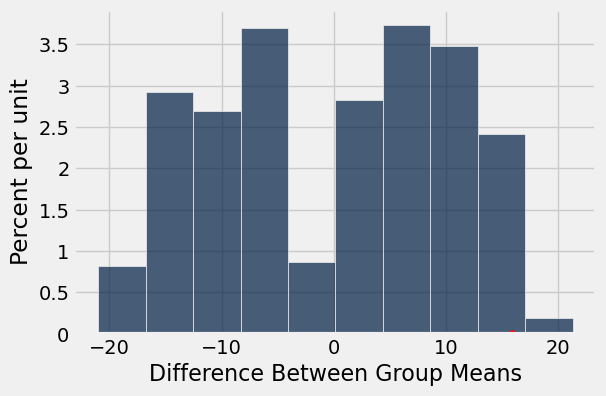

In [59]:
observed_difference = means.column("crime_count_mean")[0] - means.column("crime_count_mean")[1]
observed_difference
Table().with_column('Difference Between Group Means', differences).hist(bins=10)
plt.scatter(observed_difference, 0, color='red', s=30, zorder=2)
plt.show()

In [60]:
p_val = np.count_nonzero(differences >= observed_difference) / 10000                                       
p_val

0.0401

From the p value using a 95% cutoff, we are rejecting the null hypothesis and choosing the alternative hypothesis because the p-value is less than 0.05. The alternative hypothesis is "zip codes categorized as a high crime area with have higher crime rate on a random day". From the histogram, we can already see that the difference is quite big, a small difference is very rare (this could also be affected by the small amount of data). We can draw the conclusion that *on a random day, crime rate in high-crime areas are higher than low-crime areas*. 

This means a couple things for our narrative, the first being that due to the frequent crimes such as robbery, theft, or scam that averages more occurrences on a daily basis compared to low crime neighborhoods, it is hard for individuals living in these neighborhoods to focus on study, work, or career growth. Which might cause a higher years it would take to buy a home on the graph. However, this model is not strictly accurate as it is only sampling from one random day and could have biases and outliers. We can verify this by seeing that the high crime areas does instead have a higher year to buy home average on the graph.

Overall, the tests that we ran (confidence intervals, sample proportions, and permutation tests) suggest that the data we are seeing in the graph is generally true. Neighborhoods such as 94102, 94112, and 94121 (more-so 94102 because of its statistical significance that we noted from the earlier confidence interval tests) are having a difficult time matching their income with rising home values because of factors like high crime rate. While these tests are not proving any causation, we can generalize an association based on the research that we have done in Project 1 with the articles and this project's results. 

# Reflection

This project focused on testing hypothesis and checking if the graph of "How many years it would take to buy a home" is accurate in terms of the conclusions that I drew from it in Project 1. The first part was the confidence interval, where we calculated confidence intervals for the zip codes as a whole as well as 3 year samples and it showed that some zip codes such as 94102 are indeed statistically significant. The second part was comparing results from my own estimate to a study's estimate for future median home values; from which I noted that in order to make complex estimations of variables like future home values, a lot more data and more complex models are needed. Lastly, in the testing hypothesis section, I explored sample proportions and permutation tests to see if crime rate has any association with higher years to buy and if a high crime rate zip code translates to a higher crime rate on a daily basis. 

Some issues that I faced when doing this project were collecting and organizing data, as well as planning on my models. Finding relevant data was challenging due to how narrow the project's scope was, and organizing it was also difficult because of my unfamiliar with API and had to make inefficient adjustments. Also due to the limitations of current API and advanced table sorting methods, I couldn't incorporate the entirety of the data that I wanted to sample from. As for the models, due to the fact that my project features tables that have multiple categories (the zip codes), it is different from the work that I have been doing in the labs. For example, I have multiple categories to test for in my sample proportions to test for (the different zip codes) and each category returns a different p-value and I was not sure on how to work with that. I still need more experience designing my own experiments where the variables in play are different from the classwork that I have done so far. 

Some success that I found was splitting the experiments by parts and referencing the lab and homework that I did prior, I broke down the steps that I needed to get to my results and used the templates from those previous work as a guideline.

Finally, this project is by no means perfect, there are a lot of room for improvement. As a follow up, some changes like the way the data was obtained and the way the data was sorted can be made with more complex algorithms. The experiments can also be more sophisticated and use all of the data available to generate more accurate and informative results, as well as a better model as the amount of methods and functions get expanded. 

There were a lot of exploring in uncertainty when working on this project, but I feel like I have gained a lot of valuable experiences and I believe that it will serve as a solid foundation for my future work.